In [1]:
#參考資料 https://www.kaggle.com/outrunner/use-keras-to-count-sea-lions
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import os
import cv2
from tempfile import TemporaryFile

In [11]:
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convnatural_sortert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [34]:
# get file list
import re
corpus_path = "/home/alvin/cei/notebook_home/ai_lab_image/corpus/KaggleNOAASeaLions/Train/"
filelist = os.listdir(corpus_path)
print('Total traing file = ' + str(len(filelist)))
filelist = filter(lambda x: x.endswith('.jpg'), filelist)
filelist = list(filelist)
print('Total traing file = ' + str(len(filelist)))

Total traing file = 949
Total traing file = 948


In [ ]:
filelist = natural_sort(filelist)
print(filelist)

In [36]:
pixel_count = {}
for idx, filename in enumerate(filelist):
    #print(corpus_path + filename)
    image_1 = cv2.imread(corpus_path + filename)
    print(str(idx) + '\t' + str(filename) + '\t=> ' + str(image_1.shape))
    if str(image_1.shape) in pixel_count:
        pixel_count[str(image_1.shape)] += 1
    else:
        pixel_count[str(image_1.shape)] = 1

0	0.jpg	=> (3744, 5616, 3)
1	1.jpg	=> (3744, 5616, 3)
2	2.jpg	=> (3328, 4992, 3)
3	3.jpg	=> (3328, 4992, 3)
4	4.jpg	=> (3744, 5616, 3)
5	5.jpg	=> (3328, 4992, 3)
6	6.jpg	=> (3328, 4992, 3)
7	7.jpg	=> (3744, 5616, 3)
8	8.jpg	=> (3328, 4992, 3)
9	9.jpg	=> (3328, 4992, 3)
10	10.jpg	=> (3328, 4992, 3)
11	11.jpg	=> (3744, 5616, 3)
12	12.jpg	=> (3744, 5616, 3)
13	13.jpg	=> (3328, 4992, 3)
14	14.jpg	=> (3744, 5616, 3)
15	15.jpg	=> (3328, 4992, 3)
16	16.jpg	=> (3328, 4992, 3)
17	17.jpg	=> (3328, 4992, 3)
18	18.jpg	=> (3744, 5616, 3)
19	19.jpg	=> (3328, 4992, 3)
20	20.jpg	=> (3328, 4992, 3)
21	21.jpg	=> (3328, 4992, 3)
22	22.jpg	=> (3328, 4992, 3)
23	23.jpg	=> (3328, 4992, 3)
24	24.jpg	=> (3744, 5616, 3)
25	25.jpg	=> (3744, 5616, 3)
26	26.jpg	=> (3744, 5616, 3)
27	27.jpg	=> (3744, 5616, 3)
28	28.jpg	=> (3328, 4992, 3)
29	29.jpg	=> (3328, 4992, 3)
30	30.jpg	=> (3328, 4992, 3)
31	31.jpg	=> (3744, 5616, 3)
32	32.jpg	=> (3328, 4992, 3)
33	33.jpg	=> (3744, 5616, 3)
34	34.jpg	=> (3744, 5616, 3)
35	35

272	272.jpg	=> (3744, 5616, 3)
273	273.jpg	=> (3744, 5616, 3)
274	274.jpg	=> (3328, 4992, 3)
275	275.jpg	=> (3328, 4992, 3)
276	276.jpg	=> (3328, 4992, 3)
277	277.jpg	=> (3328, 4992, 3)
278	278.jpg	=> (3744, 5616, 3)
279	279.jpg	=> (3744, 5616, 3)
280	280.jpg	=> (3328, 4992, 3)
281	281.jpg	=> (3328, 4992, 3)
282	282.jpg	=> (3744, 5616, 3)
283	283.jpg	=> (3328, 4992, 3)
284	284.jpg	=> (3328, 4992, 3)
285	285.jpg	=> (3744, 5616, 3)
286	286.jpg	=> (3744, 5616, 3)
287	287.jpg	=> (3328, 4992, 3)
288	288.jpg	=> (3328, 4992, 3)
289	289.jpg	=> (3328, 4992, 3)
290	290.jpg	=> (3328, 4992, 3)
291	291.jpg	=> (3744, 5616, 3)
292	292.jpg	=> (3744, 5616, 3)
293	293.jpg	=> (3744, 5616, 3)
294	294.jpg	=> (3744, 5616, 3)
295	295.jpg	=> (3328, 4992, 3)
296	296.jpg	=> (3744, 5616, 3)
297	297.jpg	=> (3744, 5616, 3)
298	298.jpg	=> (3744, 5616, 3)
299	299.jpg	=> (3744, 5616, 3)
300	300.jpg	=> (3328, 4992, 3)
301	301.jpg	=> (3744, 5616, 3)
302	302.jpg	=> (3744, 5616, 3)
303	303.jpg	=> (3744, 5616, 3)
304	304.

537	537.jpg	=> (3744, 5616, 3)
538	538.jpg	=> (3744, 5616, 3)
539	539.jpg	=> (3744, 5616, 3)
540	540.jpg	=> (3744, 5616, 3)
541	541.jpg	=> (3744, 5616, 3)
542	542.jpg	=> (3328, 4992, 3)
543	543.jpg	=> (3744, 5616, 3)
544	544.jpg	=> (3328, 4992, 3)
545	545.jpg	=> (3744, 5616, 3)
546	546.jpg	=> (3744, 5616, 3)
547	547.jpg	=> (3328, 4992, 3)
548	548.jpg	=> (3328, 4992, 3)
549	549.jpg	=> (3328, 4992, 3)
550	550.jpg	=> (3744, 5616, 3)
551	551.jpg	=> (3744, 5616, 3)
552	552.jpg	=> (3328, 4992, 3)
553	553.jpg	=> (3744, 5616, 3)
554	554.jpg	=> (3744, 5616, 3)
555	555.jpg	=> (3744, 5616, 3)
556	556.jpg	=> (3744, 5616, 3)
557	557.jpg	=> (3744, 5616, 3)
558	558.jpg	=> (3328, 4992, 3)
559	559.jpg	=> (3744, 5616, 3)
560	560.jpg	=> (3744, 5616, 3)
561	561.jpg	=> (3328, 4992, 3)
562	562.jpg	=> (3328, 4992, 3)
563	563.jpg	=> (3328, 4992, 3)
564	564.jpg	=> (3328, 4992, 3)
565	565.jpg	=> (3328, 4992, 3)
566	566.jpg	=> (3744, 5616, 3)
567	567.jpg	=> (3328, 4992, 3)
568	568.jpg	=> (3744, 5616, 3)
569	569.

802	802.jpg	=> (3744, 5616, 3)
803	803.jpg	=> (3744, 5616, 3)
804	804.jpg	=> (3328, 4992, 3)
805	805.jpg	=> (3328, 4992, 3)
806	806.jpg	=> (3744, 5616, 3)
807	807.jpg	=> (3744, 5616, 3)
808	808.jpg	=> (3328, 4992, 3)
809	809.jpg	=> (3328, 4992, 3)
810	810.jpg	=> (3328, 4992, 3)
811	811.jpg	=> (3328, 4992, 3)
812	812.jpg	=> (3328, 4992, 3)
813	813.jpg	=> (3328, 4992, 3)
814	814.jpg	=> (3744, 5616, 3)
815	815.jpg	=> (3744, 5616, 3)
816	816.jpg	=> (3328, 4992, 3)
817	817.jpg	=> (3744, 5616, 3)
818	818.jpg	=> (3744, 5616, 3)
819	819.jpg	=> (3328, 4992, 3)
820	820.jpg	=> (3328, 4992, 3)
821	821.jpg	=> (3328, 4992, 3)
822	822.jpg	=> (3744, 5616, 3)
823	823.jpg	=> (3744, 5616, 3)
824	824.jpg	=> (3744, 5616, 3)
825	825.jpg	=> (3328, 4992, 3)
826	826.jpg	=> (3328, 4992, 3)
827	827.jpg	=> (3328, 4992, 3)
828	828.jpg	=> (3744, 5616, 3)
829	829.jpg	=> (3744, 5616, 3)
830	830.jpg	=> (3744, 5616, 3)
831	831.jpg	=> (3328, 4992, 3)
832	832.jpg	=> (3744, 5616, 3)
833	833.jpg	=> (3744, 5616, 3)
834	834.

In [37]:
for key,val in pixel_count.items():
    print(key + '\t' + str(val))
        

(3328, 4992, 3)	458
(3744, 5616, 3)	488
(5616, 3744, 3)	2


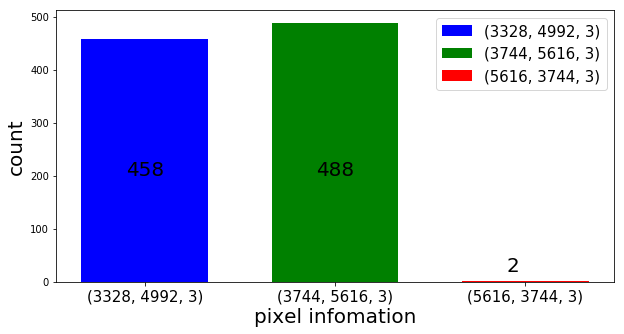

In [82]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
y = pixel_count.values()
N = len(y)
x = range(N)
width = 1/1.5
s1 = plt.bar(x, y, width, color=('b','g','r'))
plt.legend(s1, pixel_count.keys(),fontsize=15)
plt.xticks(range(len(y)),pixel_count.keys(),fontsize=15 )
plt.xlabel('pixel infomation',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.text(0-0.1,200,list(y)[0],fontsize=20)
plt.text(1-0.1,200,list(y)[1],fontsize=20)
plt.text(2-0.1,20,list(y)[2],fontsize=20)



In [72]:
list(pixel_count.values())

[458, 488, 2]